In [1]:
from ema_workbench import (MultiprocessingEvaluator,SequentialEvaluator, ema_logging, save_results, load_results)
from SALib.analyze import sobol
from ema_workbench.em_framework.evaluators import SOBOL
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ema_problem_definitions import ema_problem

In [2]:
# enable logging
ema_logging.LOG_FORMAT = '%(message)s'
ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [3]:
# import problem definition
model = ema_problem(2)

In [7]:
with MultiprocessingEvaluator(model, n_processes=16) as evaluator:
    experiment_SOBOL, outcomes_SOBOL = evaluator.perform_experiments(scenarios = 5, uncertainty_sampling=SOBOL)

pool started
performing 40 scenarios * 1 policies * 1 model(s) = 40 experiments
4 cases completed
8 cases completed
12 cases completed
16 cases completed
20 cases completed
24 cases completed
28 cases completed
32 cases completed
36 cases completed
40 cases completed
experiments finished
terminating pool


In [5]:
# prepare SOBOL from results
def get_sobol_results(variable):
    problem = get_SALib_problem(model.uncertainties)
    Si = sobol.analyze(problem, outcomes_SOBOL[variable],
                    calc_second_order=True, print_to_console=False)
    scores_filtered = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
    Si_df = pd.DataFrame(scores_filtered, index=problem['names'])

    sns.set_style('white')
    fig, ax = plt.subplots(1)

    indices = Si_df[['S1','ST']]
    err = Si_df[['S1_conf','ST_conf']]

    indices.plot.bar(yerr=err.values.T,ax=ax)
    fig.set_size_inches(8,6)
    fig.subplots_adjust(bottom=0.3)
    plt.show()

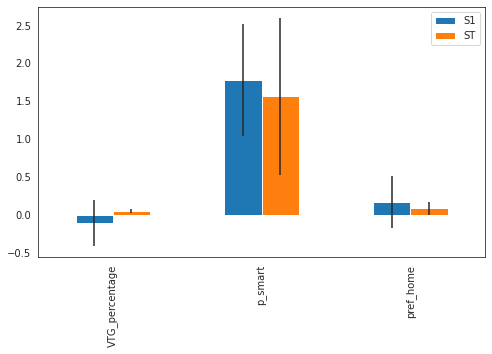

In [6]:
get_sobol_results('mean_power_demand')

In [ ]:
pd.DataFrame(experiment_SOBOL)

In [ ]:
sobol_results = save_results((experiment_SOBOL, outcomes_SOBOL), '../data/ema/sobol_results.tar.gz')

In [ ]:
experiment_SOBOL, outcomes_SOBOL = load_results('sobol_results.tar.gz')